In [8]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import numpy as np
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np
import matplotlib.pyplot as plt

In [9]:
from matplotlib.pyplot import figure

In [10]:
import operator

In [11]:
import re
from nltk.stem.wordnet import WordNetLemmatizer

In [12]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

In [13]:
lemmatizer = WordNetLemmatizer()

In [14]:
df = pd.read_csv('Learning_disability2.csv')

/Users/pandurangprabhu/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1,5,6,8,10,11,12,13,14,15,19,22) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [15]:
df.head()


,Unnamed: 0,created_at,date,timezone,tweet,language,hashtags,cashtags,day,hour,...,nreplies,nretweets,quote_url,search,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,0,1.27E+12,08/02/10 5:29,530.0,Wrote a number six yesterday and couldn't tell...,en,[],[],1,5.0,...,0.0,0.0,NaN,Dyslexia,NaN,[],NaN,NaN,NaN,NaN
1,1,1.27E+12,08/02/10 5:00,530.0,dyslexia worsening... time for a break - what'...,en,[],[],1,5.0,...,0.0,0.0,NaN,Dyslexia,NaN,[],NaN,NaN,NaN,NaN
2,2,1.27E+12,08/02/10 4:41,530.0,My Child Has A Reading Disability. Will He Hav...,en,"['dyslexia', 'literacy', 'parenting']",[],1,4.0,...,0.0,0.0,NaN,Dyslexia,NaN,[],NaN,NaN,NaN,NaN
3,3,1.27E+12,08/02/10 3:44,530.0,"@kg4uzj ""Old McDonald had dyslexia, O,I,E,I,E....",no,[],[],1,3.0,...,0.0,0.0,NaN,Dyslexia,NaN,[],NaN,NaN,NaN,NaN
4,4,1.27E+12,08/02/10 3:32,530.0,#shoutout to dyslexia fucking up my spelling s...,en,['shoutout'],[],1,3.0,...,0.0,0.0,NaN,Dyslexia,NaN,[],NaN,NaN,NaN,NaN


In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267814 entries, 0 to 267813
Data columns (total 27 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    267814 non-null  int64  
 1   created_at    196119 non-null  object 
 2   date          196119 non-null  object 
 3   timezone      196119 non-null  float64
 4   tweet         196119 non-null  object 
 5   language      125609 non-null  object 
 6   hashtags      125609 non-null  object 
 7   cashtags      125609 non-null  object 
 8   day           125609 non-null  object 
 9   hour          125609 non-null  float64
 10  link          125609 non-null  object 
 11  urls          125609 non-null  object 
 12  photos        125590 non-null  object 
 13  video         125609 non-null  object 
 14  thumbnail     14562 non-null   object 
 15  retweet       125590 non-null  object 
 16  nlikes        125590 non-null  float64
 17  nreplies      125590 non-null  float64
 18  nret

In [17]:
df = df.drop(columns=['Unnamed: 0', 'reply_to', 'retweet_id', 'translate', 'trans_src', 'trans_dest'])

In [18]:
df = df.drop(columns=['photos', 'video', 'thumbnail', 'quote_url', 'search', 'urls', ])
df = df.drop(columns=['retweet_date'])

In [19]:
list_of_stuff = df[df['tweet'].isnull()].index.tolist()

In [20]:
df = df.drop(list_of_stuff)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196119 entries, 0 to 267813
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   created_at  196119 non-null  object 
 1   date        196119 non-null  object 
 2   timezone    196119 non-null  float64
 3   tweet       196119 non-null  object 
 4   language    125609 non-null  object 
 5   hashtags    125609 non-null  object 
 6   cashtags    125609 non-null  object 
 7   day         125609 non-null  object 
 8   hour        125609 non-null  float64
 9   link        125609 non-null  object 
 10  retweet     125590 non-null  object 
 11  nlikes      125590 non-null  float64
 12  nreplies    125590 non-null  float64
 13  nretweets   125590 non-null  float64
dtypes: float64(5), object(9)
memory usage: 22.4+ MB


In [22]:
timezones = {}
for i in df['timezone']:
    if i not in timezones:
        timezones[i] = 1
    else:
        timezones[i] += 1
        
print(timezones)

{530.0: 196100, 7.21e+17: 1, 756490298.0: 1, 96295751.0: 1, 1498115041.0: 1, 29566076.0: 1, 1.35e+18: 1, 52055276.0: 1, 2800367058.0: 1, 134681248.0: 1, 102420410.0: 1, 204416356.0: 1, 449957516.0: 1, 173631560.0: 1, 14549803.0: 1, 408604849.0: 2, 8.27e+17: 1, 19861106.0: 1, 582287390.0: 1}


## Note the fact that the 530 timezone contains most of the tweets, Lets look at the languages too

In [25]:
languages = {}
for i in df['language']:
    if i not in languages:
        languages[i] = 1
    else:
        languages[i] += 1
        
print(languages)



{'en': 116981, 'no': 91, 'cy': 1636, 'und': 1592, 'es': 344, 'ja': 314, 'ru': 13, 'in': 1245, 'tl': 193, 'zh': 8, 'ro': 209, 'da': 272, 'qme': 726, 'ar': 492, 'cs': 49, 'nl': 169, 'pl': 450, 'de': 42, 'fi': 101, 'ht': 27, 'qht': 115, 'el': 11, 'sv': 13, 'fr': 116, 'eu': 3, 'tr': 38, 'et': 12, 'hi': 4, 'lt': 7, 'is': 16, nan: 67779, '1': 2, 'zxx': 52, 'lv': 4, 'art': 8, 'qam': 38, 'fa': 7, 'ur': 1, 'qst': 10, 'it': 62, 'ko': 7, 'pt': 34, '4': 4, 'sl': 2, 'ca': 44, 'th': 19, '2': 5, '6': 3, 'uk': 2, 'ta': 1, 'ml': 1, 4.0: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1,

## Since this analysis mostly focuses on english tweets, we can drop all the other non english tweets, this shouldnt really be problematic since the majority of the tweets are written in English


In [27]:
# Testing whether only tweets related to english is present
df['language'].unique()

array(['en', 'no', 'cy', 'und', 'es', 'ja', 'ru', 'in', 'tl', 'zh', 'ro',
       'da', 'qme', 'ar', 'cs', 'nl', 'pl', 'de', 'fi', 'ht', 'qht', 'el',
       'sv', 'fr', 'eu', 'tr', 'et', 'hi', 'lt', 'is', nan, '1', 'zxx',
       'lv', 'art', 'qam', 'fa', 'ur', 'qst', 'it', 'ko', 'pt', '4', 'sl',
       'ca', 'th', '2', '6', 'uk', 'ta', 'ml', 4.0, 'hu', '5', '7', 'vi',
       'bn'], dtype=object)

In [28]:
final_df = df.drop(df[df['language'] != 'en'].index)

In [29]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116981 entries, 0 to 267813
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   created_at  116981 non-null  object 
 1   date        116981 non-null  object 
 2   timezone    116981 non-null  float64
 3   tweet       116981 non-null  object 
 4   language    116981 non-null  object 
 5   hashtags    116981 non-null  object 
 6   cashtags    116981 non-null  object 
 7   day         116981 non-null  object 
 8   hour        116981 non-null  float64
 9   link        116981 non-null  object 
 10  retweet     116981 non-null  object 
 11  nlikes      116981 non-null  float64
 12  nreplies    116981 non-null  float64
 13  nretweets   116981 non-null  float64
dtypes: float64(5), object(9)
memory usage: 13.4+ MB


In [30]:
final_df = final_df.reset_index()

In [32]:
first_half_date = []
second_half_date = []
for i in range(len(final_df['date'])):
    if i <= 49341:
        first_half_date.append(final_df['date'][i])
    else:
        second_half_date.append(final_df['date'][i])
    
    


In [33]:
print(len((first_half_date)))
print(len(set(first_half_date)))
print(len((second_half_date)))
print(len(set(second_half_date)))

49342
39100
67639
60751


In [34]:
stop_words = set(stopwords.words('english'))

In [36]:
for i in range(len(final_df['tweet'])):
    final_df['tweet'][i] = re.sub(r'^https?:\/\/.*[\r\n]*', '', final_df['tweet'][i], flags=re.MULTILINE)
    word_token = word_tokenize(final_df['tweet'][i])
    filtered_sentence = [w.lower() for w in word_token if not w.lower() in stop_words]
    filtered_sentence = [lemmatizer.lemmatize(word) for word in filtered_sentence]
    final_df['tweet'][i] = ' '.join(filtered_sentence)

    
    

<ipython-input-36-2d7b42c1cd16>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['tweet'][i] = re.sub(r'^https?:\/\/.*[\r\n]*', '', final_df['tweet'][i], flags=re.MULTILINE)
<ipython-input-36-2d7b42c1cd16>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['tweet'][i] = ' '.join(filtered_sentence)


In [37]:
final_df.head()

,index,created_at,date,timezone,tweet,language,hashtags,cashtags,day,hour,link,retweet,nlikes,nreplies,nretweets
0,0,1.27E+12,08/02/10 5:29,530.0,wrote number six yesterday could n't tell forw...,en,[],[],1,5.0,https://twitter.com/Kerry_McGuire/status/87853...,False,0.0,0.0,0.0
1,1,1.27E+12,08/02/10 5:00,530.0,dyslexia worsening ... time break - 's everyone,en,[],[],1,5.0,https://twitter.com/mhp/status/8784063860,False,0.0,0.0,0.0
2,2,1.27E+12,08/02/10 4:41,530.0,child reading disability . emotional problem ?...,en,"['dyslexia', 'literacy', 'parenting']",[],1,4.0,https://twitter.com/GaryBrannigan/status/87832...,False,0.0,0.0,0.0
3,4,1.27E+12,08/02/10 3:32,530.0,# shoutout dyslexia fucking spelling since 1986,en,['shoutout'],[],1,3.0,https://twitter.com/que_teena/status/8780755550,False,0.0,0.0,0.0
4,5,1.27E+12,08/02/10 3:29,530.0,slang like fucking dyslexia .,en,[],[],1,3.0,https://twitter.com/AliceRoyds/status/8780657873,False,0.0,0.0,0.0


In [38]:
final_df.to_csv('cleaned_df.csv')
#Saving the cleaned dataframe

In [39]:
final_df = pd.read_csv('cleaned_df.csv')

In [40]:
sid_obj = SentimentIntensityAnalyzer()

In [41]:
vectorized_sents_=[]
sentences_parallel_list = []



for sent1 in final_df['tweet']:
    score_=[]
    final_sentiments = sid_obj.polarity_scores(sent1)
    score_.append(final_sentiments['pos'])
    score_.append(final_sentiments['neg'])
    vectorized_sents_.append(score_)
    sentences_parallel_list.append(sent1)



In [42]:
vectorized_sents_  = np.array(vectorized_sents_)

In [43]:
positive_vectorized_sents = vectorized_sents_[:,0] # positive
negative_vectorized_sents = vectorized_sents_[:,1] # negative

Text(0, 0.5, ' Negative ')

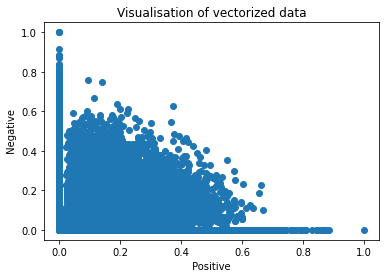

In [44]:
plt.title("Visualisation of vectorized data")
plt.scatter(x=positive_vectorized_sents, y=negative_vectorized_sents)
plt.xlabel(" Positive ")
plt.ylabel(" Negative ")

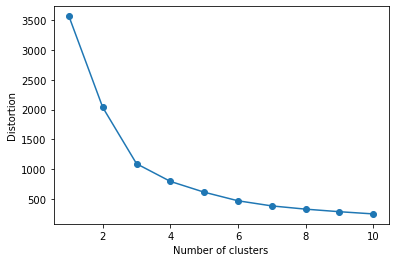

In [45]:
# elbow method to find best number of clusters
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='k-means++',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(vectorized_sents_)
    distortions.append(km.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

## The main aim of a good clustering model is low inertia and low number of clusters, which is why i will chose 4 clusters

In [46]:
km_model = KMeans(n_clusters=4, init="k-means++")

In [47]:
clustered = km_model.fit(vectorized_sents_)

In [48]:
clustered.cluster_centers_

array([[0.00863586, 0.01506252],
       [0.36159016, 0.02880287],
       [0.17848104, 0.03717235],
       [0.05168368, 0.27003733]])

In [49]:
final_top_words = {}
f_dict={}
for i in range(4):
    d = clustered.transform(vectorized_sents_)[:, i]
    ind = np.argsort(d)[::][:50]
    final_list = [sentences_parallel_list[k] for k in ind]
    dict1 = {}
    for j in final_list:
        for z in j.split(' '):
            if z in dict1.keys():
                dict1[z]+=1
            else:
                dict1[z] = 1
     
    
    
    dict2 = sorted(dict1, key=dict1.get)
 
    for w in dict2:
        f_dict[w] = dict1[w]
    
    x = list(f_dict.keys())
    #print(x)
    final_top_words[i] = x[-100:]
    
print(final_top_words)
 

{0: ['whoweareuk', 'lizditz', 'getqueenbee', 'kristenkiefer4', 'knwachter', 'wendyorent', 'obnoxbe', 'margie_moo', 'milanovnina', 'hupperichwerner', 'scienceotter1', 'danielbabanks', 'mc40_e', 'stopvaxxedlies', 'amanda_pompili', 'ianfmusgrave', 'emmagpaley', 'saluce65', 'account', 'preventing', 'edtech', 'stem', 'pbl', 'k12', 'ece', 'highered', 'classroom', 'edchat', 'edtechchat', 'elearning', 'earlyed', 'collegechat', 'autistic', 'learn', 'mathematical', 'come', 'neurodivergant', 'even', 'real__ari', 'jbarnathan', 'malkaavram', 'leylakhalid22', 'learning', 'reading', 'writing', 'work', 'lot', 'thing', '&', 'amp', ';', 'child', '(', ')', 'krochetxkorner', 'carlsmythe', 'hades91117954', 'anastasiaklynch', 'teacher', 'autism', 'thought', 'adhd', 'lisatrainer10', 'e_neko_san', 'margolisshana', 'angelin80379301', 'ladyalmagreen', 'priestsanity', 'toprantking', 'rasputinish', 'artspeakcentral', 'serhumanomiguel', 'hebmacman', 'copia_copma1', 'know', 'try', 'people', 'realhasdaic', 'slax43',

In [51]:
def total_terms(term):
    term_count=0
    for i in final_df['tweet']:
        if term in i.split():
            term_count+=1
    
    return term_count

In [52]:
def total_pos_neg(term):
    total_pos=0
    total_neg=0
    for i in final_df['tweet']:
        if term in i.split():
            final_sentiments = sid_obj.polarity_scores(i)
            pos_score = final_sentiments['pos']
            neg_score = final_sentiments['neg']
            if(pos_score>neg_score):
                total_pos+=1
            else:
                total_neg+=1
        
    return total_pos, total_neg


In [53]:
keywords = ["dyscalculia", "dyslexia", "dysgraphia"]

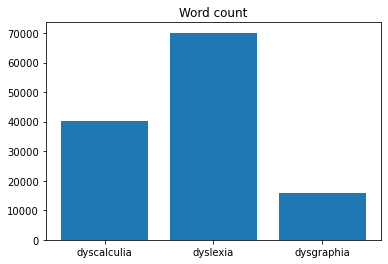

In [54]:
terms=[]
for i in keywords:
    total_count = total_terms(i)
    terms.append(total_count)

plt.title("Word count")
plt.bar(keywords, terms)
plt.show()

In [55]:

pos_neg_arr=[]
for i in keywords:
    pos, neg = total_pos_neg(i)
    print(f"The total positive for the word {i} is {pos} and the negative is {neg}")
    pos_neg_arr.append([pos, neg])
   
    

The total positive for the word dyscalculia is 16266 and the negative is 23919
The total positive for the word dyslexia is 33851 and the negative is 36248
The total positive for the word dysgraphia is 7567 and the negative is 8126


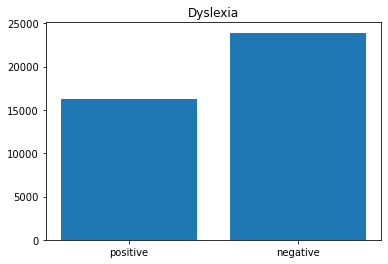

In [56]:
plt.title("Dyslexia")
plt.bar(['positive', 'negative'], pos_neg_arr[0])
plt.show()

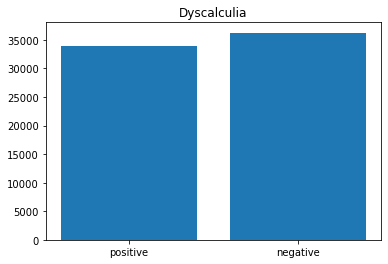

In [57]:
plt.title("Dyscalculia")
plt.bar(['positive', 'negative'], pos_neg_arr[1])
plt.show()

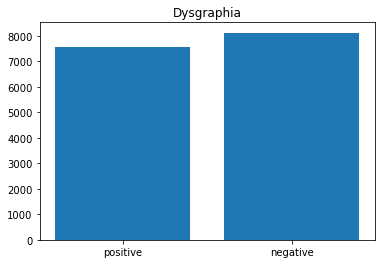

In [58]:
plt.title("Dysgraphia")
plt.bar(['positive', 'negative'], pos_neg_arr[2])
plt.show()

In [59]:
final_dates = {}
for i in final_df['date']:
    if i[:8] in final_dates:
        final_dates[i[:8]] = final_dates[i[:8]]+1
    else:
        final_dates[i[:8]]=1
        

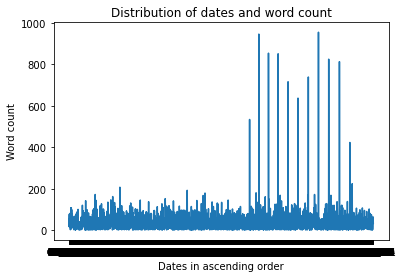

In [60]:
#sorted_dict = sorted(final_dates.items(), key = operator.itemgetter(1))
sorted_dict = sorted(final_dates)

x_val = []
y_val = []

for i in sorted_dict:
    x_val.append(i)
    y_val.append(final_dates[i])

plt.title("Distribution of dates and word count")
plt.xlabel("Dates in ascending order")
plt.ylabel("Word count")
plt.plot(x_val, y_val)
plt.show()




['19/07/22', '20/07/22', '21/07/22', '22/07/22', '23/07/22', '24/07/22', '25/07/22', '26/07/22', '27/07/22', '28/07/22', '29/07/22', '29/10/19']


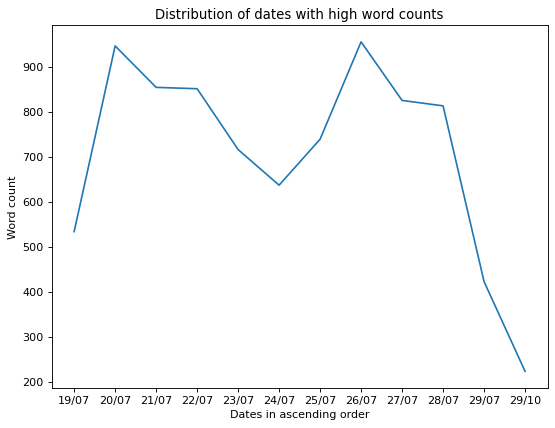

In [61]:
figure(figsize=(8, 6), dpi=80)
dates_with_most_words = sorted(final_dates.items(), key = operator.itemgetter(1))[-12:]
dates = []
values = []
for i in dates_with_most_words:
    dates.append(i[0])
    
dates=sorted(dates)

dates_values=[]
for i in dates:
    dates_values.append(final_dates[i])

print(dates)

plt.title("Distribution of dates with high word counts")
plt.xlabel("Dates in ascending order")
plt.ylabel("Word count")
plt.plot([i[:5] for i in dates], dates_values)
plt.show()

In [62]:
dict1 = {'19/07/22': [], '20/07/22' : [], '21/07/22' : [], '22/07/22' : [], '23/07/22': [], '24/07/22': [], '25/07/22': [], '26/07/22': [], '27/07/22':[], '28/07/22':[], '29/07/22':[], '29/10/19':[]}
for i in range(len(final_df['date'])):
    if final_df['date'][i][:8] in dates:
        dict1[final_df['date'][i][:8]] = dict1[final_df['date'][i][:8]] + [final_df['tweet'][i]]
        
        

In [63]:
dict2 = {}
for i in dict1:
    total_pos=0
    total_neg=0
    for z in dict1[i]:
        final_sentiments = sid_obj.polarity_scores(z)
        pos_score = final_sentiments['pos']
        neg_score = final_sentiments['neg']
        if(pos_score>neg_score):
            total_pos+=1
        else:
            total_neg+=1
      
            
    dict2[i] = [total_pos, total_neg]
        

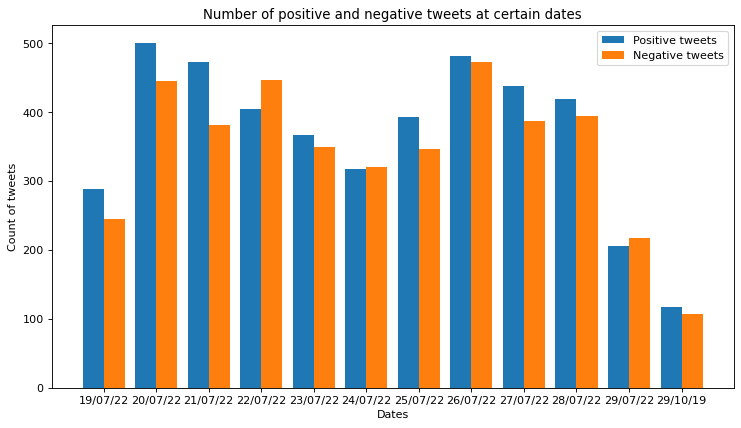

In [64]:
figure(figsize=(11, 6), dpi=80)
X = [i[:8] for i in dict2.keys()]
Y_pos = [i[0] for i in dict2.values()]
Z_neg = [i[1] for i in dict2.values()]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Y_pos, 0.4, label = 'Positive tweets')
plt.bar(X_axis + 0.2, Z_neg, 0.4, label = 'Negative tweets')
  
plt.xticks(X_axis, X)
plt.xlabel("Dates")
plt.ylabel("Count of tweets")
plt.title("Number of positive and negative tweets at certain dates")
plt.legend()
plt.show()